In [36]:
import numpy as np 
import matplotlib.pyplot as plt
data = np.genfromtxt('D:\\iti\\numerical Optimization\\RegData.csv', delimiter=',')
x = data[:,0]
y = data[:,1]




In [37]:
e = 1 * (10**-8)
alfa = 2
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 100

def adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        v0 = v0 + diff_theta0**2
        v1 = v1 + diff_theta1**2
        
        theta0 = theta0 - (alfa*diff_theta0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa*diff_theta1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 
        
    

In [38]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 = adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e )   

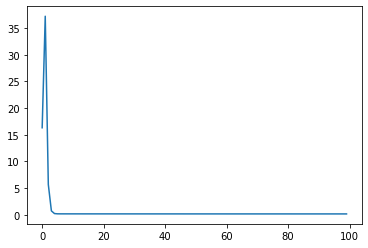

In [39]:
plt.plot(cost_lst)

In [40]:
y_predicted = theta0 + theta1 * x

In [41]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.8195008563154026

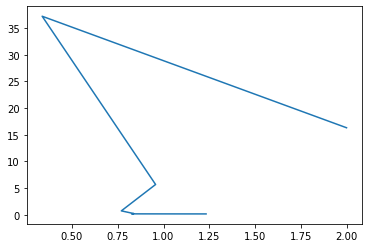

In [42]:
plt.plot(theta0_lst,cost_lst)

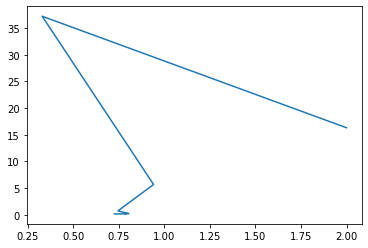

In [43]:
plt.plot(theta1_lst,cost_lst)

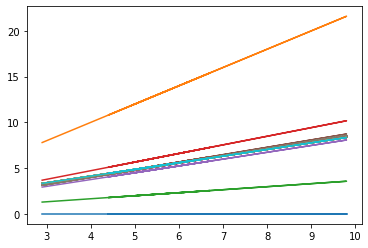

In [44]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

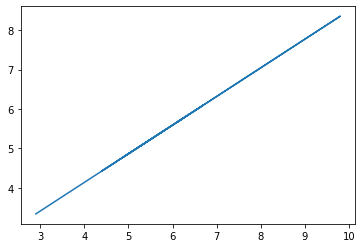

In [45]:
plt.plot(x,y_predicted)

In [46]:
x = np.linspace(0,20)
y = -2 * x + 1

In [47]:
e = 1 * (10**-8)
alfa = 3
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 100
beta = 0.98

def rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        v0 = beta * v0 + (1 - beta) * diff_theta0**2
        v1 = beta * v1 + (1 - beta) * diff_theta1**2
        
        theta0 = theta0 - (alfa*diff_theta0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa*diff_theta1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 
        
    

In [48]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 = rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta )  

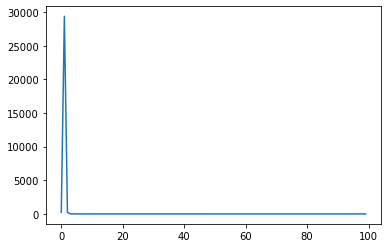

In [49]:
plt.plot(cost_lst)


In [50]:
y_predicted = theta0 + theta1 * x

In [51]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999956710607132

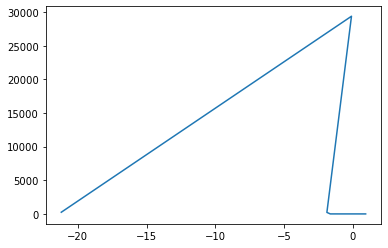

In [52]:
plt.plot(theta0_lst,cost_lst)

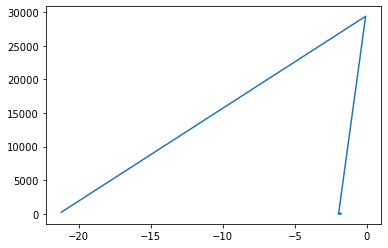

In [53]:
plt.plot(theta1_lst,cost_lst)

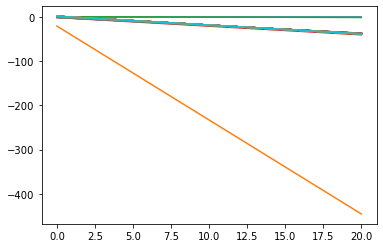

In [54]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

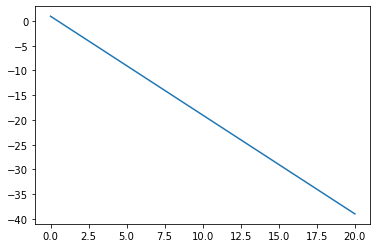

In [55]:
plt.plot(x,y_predicted)


In [56]:
e = 1 * (10**-8)
alfa = 2
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
m0 = 0 
m1 = 0
n = 1000
beta1 = 0.98
beta2 = .9

def adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
   
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        m0 = beta1 * m0 + (1 - beta1) * diff_theta0
        m1 = beta1 * m1 + (1 - beta1) * diff_theta1
        
        v0 = beta2 * v0 + (1 - beta2) * diff_theta0**2
        v1 = beta2 * v1 + (1 - beta2) * diff_theta1**2
        
        theta0 = theta0 - (alfa * m0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa * m1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
       
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 
        
    

In [57]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 = adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 )

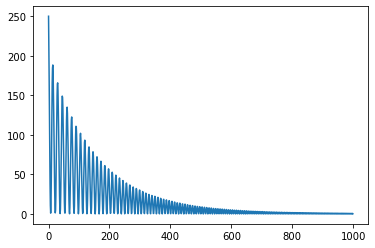

In [58]:
plt.plot(cost_lst)


In [59]:
y_predicted = theta0 + theta1 * x

In [60]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9990784712319047

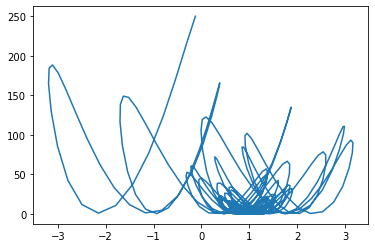

In [61]:
plt.plot(theta0_lst,cost_lst)

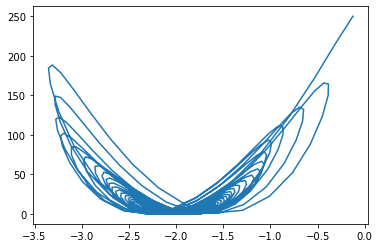

In [62]:
plt.plot(theta1_lst,cost_lst)

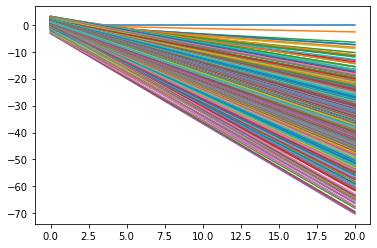

In [63]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])
    

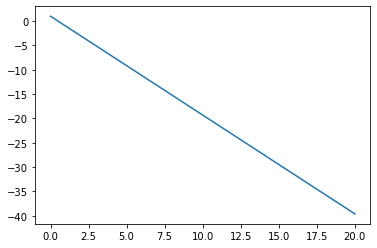

In [64]:
plt.plot(x,y_predicted)


In [78]:
e = 1 * (10**-8)
alfa = 2
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
m0 = 0 
m1 = 0
n = 1000
beta1 = 0.98
beta2 = .9

def unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
   
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        m0 = beta1 * m0 + (1 - beta1) * diff_theta0
        m1 = beta1 * m1 + (1 - beta1) * diff_theta1
        
        v0 = beta2 * v0 + (1 - beta2) * diff_theta0**2
        v1 = beta2 * v1 + (1 - beta2) * diff_theta1**2
        
        m0_hat = m0 / (1 - beta1**i)
        m1_hat = m1 / (1 - beta1**i)
        
        v0_hat = v0 / (1 - beta2**i)
        v1_hat = v1 / (1 - beta2**i)
        
        
        theta0 = theta0 - (alfa * m0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa * m1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
       
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 
        
    

In [79]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 = unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 )

<ipython-input-78-788d9a67776e>:33: RuntimeWarning: divide by zero encountered in double_scalars
  m0_hat = m0 / (1 - beta1**i)
<ipython-input-78-788d9a67776e>:34: RuntimeWarning: divide by zero encountered in double_scalars
  m1_hat = m1 / (1 - beta1**i)
<ipython-input-78-788d9a67776e>:36: RuntimeWarning: divide by zero encountered in double_scalars
  v0_hat = v0 / (1 - beta2**i)
<ipython-input-78-788d9a67776e>:37: RuntimeWarning: divide by zero encountered in double_scalars
  v1_hat = v1 / (1 - beta2**i)


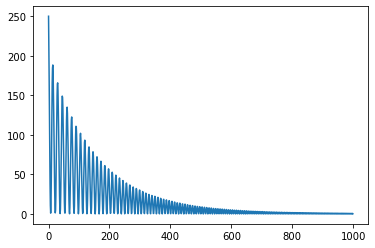

In [80]:
plt.plot(cost_lst)

In [81]:
y_predicted = theta0 + theta1 * x

In [82]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9990784712319047

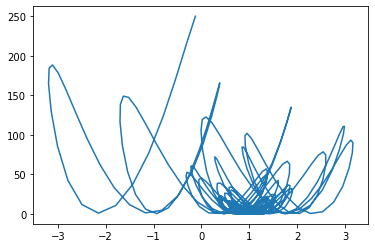

In [83]:
plt.plot(theta0_lst,cost_lst)

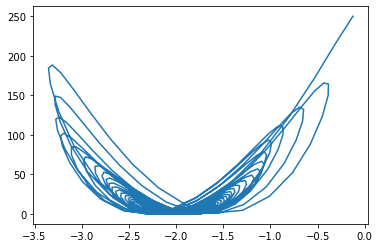

In [84]:
plt.plot(theta1_lst,cost_lst)

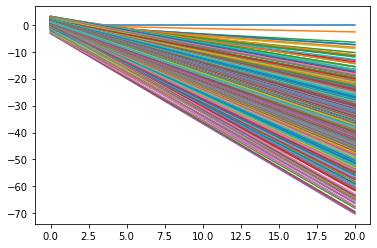

In [85]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

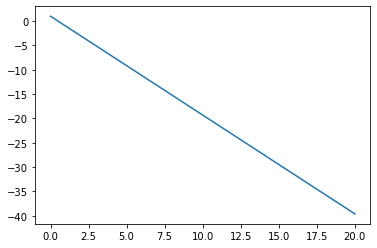

In [86]:
plt.plot(x,y_predicted)
